In [267]:
import numpy as np
import matplotlib.pyplot as plt

In [268]:
c = -100

In [269]:
def a1(z):
    return (np.exp(c*z)-1)/c

In [270]:
def b1(z):
    return (np.exp(c*z) - (1+c*z))/(c**2*z)

In [271]:
def a1Taylor5term(h):
    return (h + (c*(h)**2)/2 + (c**2)*(h**3)/6 + (c**3)*(h**4)/24) ## (e^(ch)-1)/c

In [272]:
def b1Taylor5term(h):
    return ((h)/2 + c*(h**2)/6 + (c**2)*(h**3)/24) ## (e^(ch) - (1 + ch))/(c^2 h)

In [273]:
errorN = 14


Test_H = np.zeros(errorN)

for i in range(0,errorN):
    Test_H[i] = 10**(-i)

In [274]:
a1n = a1(Test_H)

In [275]:
a1t = a1Taylor5term(Test_H)

In [276]:
a1t[-1]

np.float64(9.99999999995e-14)

In [277]:
a1n

array([1.00000000e-02, 9.99954600e-03, 6.32120559e-03, 9.51625820e-04,
       9.95016625e-05, 9.99500167e-06, 9.99950002e-07, 9.99995000e-08,
       9.99999500e-09, 9.99999950e-10, 1.00000001e-10, 9.99999972e-12,
       1.00000008e-12, 1.00000008e-13])

In [278]:
b1n = b1(Test_H)

In [279]:
b1t = b1Taylor5term(Test_H)

In [280]:
b1t[-1]

np.float64(4.999999999983334e-14)

In [281]:
b1n[-1]

np.float64(0.0)

In [282]:
b1n

array([9.90000000e-03, 9.00004540e-03, 3.67879441e-03, 4.83741804e-04,
       4.98337492e-05, 4.99833375e-06, 4.99983333e-07, 4.99997821e-08,
       5.00044450e-09, 4.99600361e-10, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00])

In [283]:
b1t

array([4.00500000e+02, 3.00000000e-01, 3.75000000e-03, 4.83750000e-04,
       4.98337500e-05, 4.99833375e-06, 4.99983334e-07, 4.99998333e-08,
       4.99999833e-09, 4.99999983e-10, 4.99999998e-11, 5.00000000e-12,
       5.00000000e-13, 5.00000000e-14])

In [284]:
b1t[-1]

np.float64(4.999999999983334e-14)

In [285]:
(a1t-b1t)[-1]

np.float64(4.9999999999666667e-14)

if eigenvalues real take the real part of the mean of the upper half of the values of the contour integrals

In [286]:
## {b1}   f(z) = (e**(cz)- (1+cz))/(c^2 z)



In [291]:
##contour integral attempt one:
M = 16  # number of points for complex means
r = np.exp(1j * np.pi * (np.arange(1, M + 1)-0.5) / M)

In [292]:
r

array([ 0.99518473+0.09801714j,  0.95694034+0.29028468j,
        0.88192126+0.47139674j,  0.77301045+0.63439328j,
        0.63439328+0.77301045j,  0.47139674+0.88192126j,
        0.29028468+0.95694034j,  0.09801714+0.99518473j,
       -0.09801714+0.99518473j, -0.29028468+0.95694034j,
       -0.47139674+0.88192126j, -0.63439328+0.77301045j,
       -0.77301045+0.63439328j, -0.88192126+0.47139674j,
       -0.95694034+0.29028468j, -0.99518473+0.09801714j])

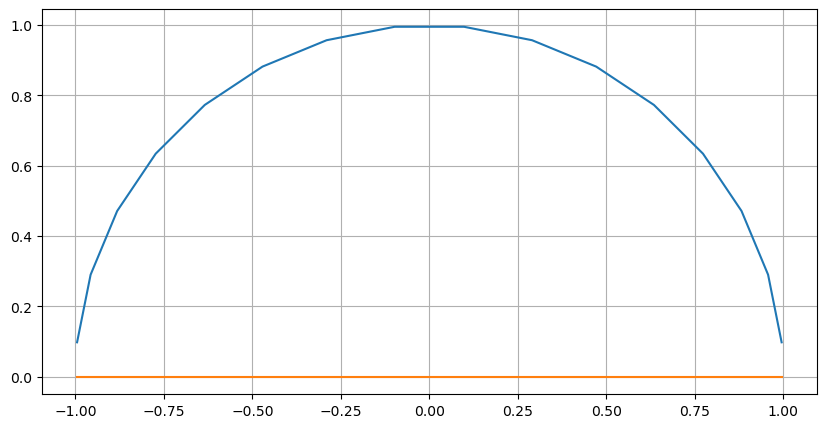

In [293]:
x = [a.real for a in r]
y = [a.imag for a in r]
plt.figure(figsize=(10, 5))
plt.plot(x,y)
plt.plot(x, np.zeros(len(x)))
plt.grid()


In [296]:
for i in range(0,14):
    z = 10**-i
    meanb1 = np.mean((np.exp(z+r)-(1 + r +z))/(r+z))
    print(meanb1)


(0.7182818284590454+0.6583052188180079j)
(0.05170918075647629+0.35081821235918276j)
(0.005016708416805793+0.33018662489557227j)
(0.0005001667083417705+0.32819944614286406j)
(5.000166670840467e-05+0.32800146790459384j)
(5.000016666763252e-06+0.327981677457393j)
(5.000001667421206e-07+0.32797969848641945j)
(5.000000168065011e-08+0.32797950059005954j)
(5.000000101451629e-09+0.32797948080043093j)
(5.000000136146099e-10+0.32797947882146816j)
(5.000000413701855e-11+0.3279794786235719j)
(5.000083680428702e-12+0.32797947860378224j)
(4.999820002460353e-13+0.32797947860180326j)
(5.012656956182582e-14+0.3279794786016053j)


For RK4, first coefficient

In [306]:
for i in range(14):
    z = -10**-i
    print(z/6 + z**3/24 + z**2/6 + z**4/24)

6.938893903907228e-18
-0.015037499999999999
-0.0016500412500000002
-0.00016650004162499998
-1.66650000416625e-05
-1.6666500000416664e-06
-1.6666650000004164e-07
-1.6666665000000042e-08
-1.66666665e-09
-1.6666666650000003e-10
-1.6666666665000002e-11
-1.66666666665e-12
-1.6666666666650001e-13
-1.6666666666665e-14


Second coefficient

In [ ]:
for i in range(14):
    z = -10**-i
    print(z/6 + z**2/12 + z**3/24)

0.2916666666666667
0.017541666666666667
0.0016750416666666667
0.00016675004166666666
1.6667500041666665e-05
1.6666750000416668e-06
1.6666675000004165e-07
1.6666667500000044e-08
1.666666675e-09
1.6666666675000001e-10
1.66666666675e-11
1.666666666675e-12
1.6666666666675e-13
1.66666666666675e-14


Final coefficient

In [ ]:
for i in range(14):
    z = -10**-i
    print(z/6-z**3/24)

0.125
0.016625
0.0016666250000000001
0.000166666625
1.6666666625000002e-05
1.6666666666250003e-06
1.66666666666625e-07
1.6666666666666624e-08
1.6666666666666667e-09
1.6666666666666669e-10
1.6666666666666667e-11
1.6666666666666666e-12
1.6666666666666667e-13
1.6666666666666667e-14
